In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import scipy  
from tqdm import tqdm
import os
import torch
from torch import nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader,Dataset
#from pytorch_lightning.core.datamodule import LightningDataModule
from pytorch_lightning.core.lightning import LightningModule
import sympy as sym
from sympy.abc import x,y
from pytorch_lightning.core.datamodule import LightningDataModule
from pytorch_lightning import loggers as pl_loggers

In [3]:
import os

name_experiment = "FourierNet__no_GRID_FourierNet__no_GRID"
version = "0_1"
name_dir = 'logs/models_checkpoints/{}/{}/checkpoints'.format(name_experiment, version)
file_name = os.listdir(name_dir)[0]

checkpoint_dir = os.path.join(name_dir,file_name)

In [204]:
name_experiment = "BasicNorm_BasicNorm"
version = "2_3"
name_dir = 'logs/models_checkpoints/{}/{}/checkpoints'.format(name_experiment, version)
file_name = os.listdir(name_dir)[0]

checkpoint_dir_2 = os.path.join(name_dir,file_name)

In [203]:
os.listdir("logs/models_checkpoints")

['FourierNet_GRID-early_stopping_min_delta_FourierNet_GRID-early_stopping_min_delta',
 'FourierNet__less_modes_FourierNet__less_modes',
 'experiment_FourierNet_experiment_FourierNet',
 'experiment_BasicCNN_experiment_BasicCNN',
 'experiment_CNNskipcon_experiment_CNNskipcon',
 'BasicNorm_BasicNorm',
 'FourierNet__no_GRID_FourierNet__no_GRID']

In [153]:
from section_1_models import FourierNet,ModelSim

checkpoint = torch.load(checkpoint_dir)
model = FourierNet

class ModelWrap(torch.nn.Module):
    def __init__(self,model):
        super().__init__()
        self._model = model(16,60, position_grid = False)
        
model = ModelWrap(model)
model.load_state_dict(checkpoint["state_dict"])

model = model._model
model.cuda()

In [207]:
from section_1_models import FourierNet,ModelSim,BasicNet

checkpoint = torch.load(checkpoint_dir_2)
model2 = BasicNet

class ModelWrap(torch.nn.Module):
    def __init__(self,model):
        super().__init__()

        self._model = model(1,70,1,blocks = [3,3,3,3,3,3], normalization = True )
     
model2 = ModelWrap(model2)
model2.load_state_dict(checkpoint["state_dict"])

model2 = model2._model
model2.cuda()

BasicNet(
  (_hidden_layers): ModuleList(
    (0): ResidualBlock(
      (norm): BatchNorm2d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (_layers): ModuleList(
        (0): Conv2d(1, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Conv2d(70, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (_shortcut): Conv2d(1, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (_activation): ReLU()
    )
    (1): ResidualBlock(
      (norm): BatchNorm2d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (_layers): ModuleList(
        (0): Conv2d(70, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Conv2d(70, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (_shortcut): Identity()
      (_activation): ReLU()
    )
    (2): ResidualBlock(
      (norm): BatchNorm2d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (_layers): ModuleList(
    

In [58]:
from section_1_models import load_data

data_dir = "data/AC"
data_names,data_arrays = load_data(data_dir)
trainnp = np.array(data_arrays[:160])
testnp = np.array(data_arrays[160:])

In [333]:
from utils import plot_phases,final_model_evaluationAC,plot_compare_2_models
  
final_model_evaluationAC(model, testnp, 6, results_dir = "./results_presentation",
                         t0 = 10, t0_2 = 0, skip_gifs_1 = 2, skip_gifs_2 = 2,skip_save_corrupted = 2)

final_model_evaluationAC(model2, testnp, 6, results_dir = "./results_presentation",
                         t0 = 10, t0_2 = 0, skip_gifs_1 = 2, skip_gifs_2 = 2,skip_save_corrupted = 2)

100%|██████████| 6/6 [00:00<00:00, 18.00it/s]


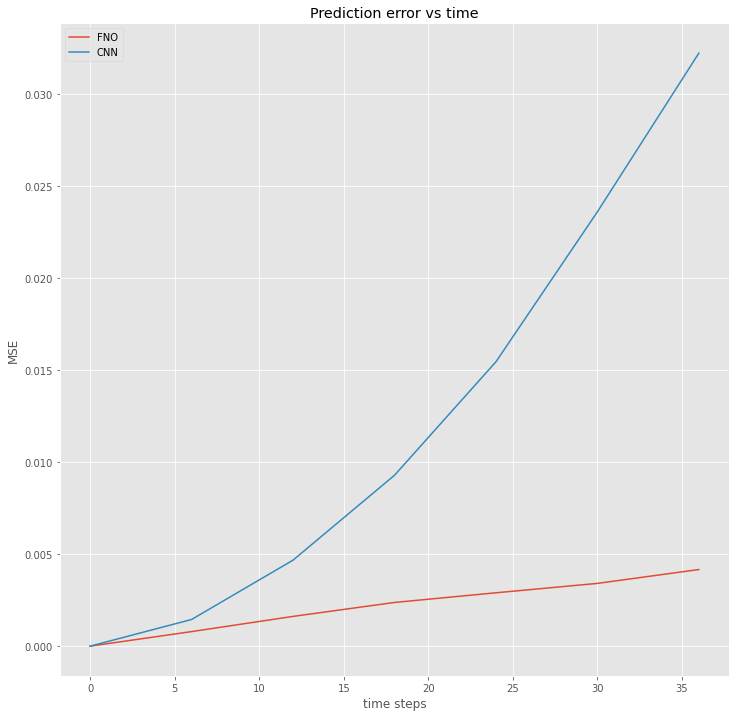

In [336]:
plot_compare_2_models(model,model2,testnp,6,t0_tf=(20,60),results_dir = "./results_presentation",
                          names = ["FNO","CNN"])